# **uplead Dependencies**

In [1]:
!pip install tensorflow
!pip install keras

In [2]:
!pip install summarytools
from summarytools import dfSummary

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense


# **read file**

In [5]:
df = pd.read_csv("/content/traffic.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
#for database retrieve

#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/mini/TrafficTwoMonth.csv')

In [6]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,DateTime[object],1. 2017-06-30 23:00:002. 2017-03-02 02:00:003. 2017-03-02 16:00:004. 2017-03-02 15:00:005. 2017-03-02 14:00:006. 2017-03-02 13:00:007. 2017-03-02 12:00:008. 2017-03-02 11:00:009. 2017-03-02 10:00:0010. 2017-03-02 09:00:0011. other,"4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)48,080 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Junction[int64],1. 12. 23. 34. 4,"14,592 (30.3%)14,592 (30.3%)14,592 (30.3%)4,344 (9.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABv0lEQVR4nO3bwWnjYBSF0adBhMlGwhhcjIuYYqcIdWOMtUhCNsoiDVh/4P6InFPBW3zIyOgO27YVJPzpfQC/h9iIGarqtapeeh/S6HPbtvfeR/Cc8Xw+/5um6dT7kBbrut6HYfgvuGMYp2k6Xa/X93meP3ofs8fj8fi7LMvpdru9VJXYDmCsqprn+eNyubz1PqbBa+8DeJ4XBGLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjZqz6/lyn9yF7HfHm325c1/W+LMupDvi5zrqu96r67H0Hz/FZODGDKR8pXhCI8TNKjHUVMdZVxFhXEeMFgRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxpnzEmPIRY4NAjCkfMZ5sxFhXEWNdRYx1FTH+1CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjHUVMdZVxNggEGNdRcxPnmyeKuzSvK6ybGKvpnWVZRMtfrKuOtzbK335U5cYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMU3rKssmWjSvqyyb2MsGgRjrKmK8IBDzBbNY2LmbecYmAAAAAElFTkSuQmCC"">",0(0.0%)
3,Vehicles[int64],Mean (sd) : 22.8 (20.8)min < med < max:1.0 < 15.0 < 180.0IQR (CV) : 20.0 (1.1),141 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACJklEQVR4nO3dQYvaQBiH8fetuxJXSBAXvfkR9uDRD9EP22uPgh9GCGvENFaR2UsthdKqE23zH57f2RkVHhITJ4yHEAzouk//+wMA13i69AJ3H5hZP3L+QwihiRwL/PTXUN19MB6PP+d5PoqZfLvdvrv7F2JFW5eOqP08z0eLxaIpimJ/y8RVVWWr1WpUlmXfzAgVrVw89ZuZFUWxn0wm3yLmH0SMAX7DxRQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokXLV9T6zT6fRsZrm7x07Bzn8wsweGWtf18/F4fJvNZr1er3fTZmpn7PyHs4eFejgcnrIse5nP5/vpdPp+63h2/sOvHnrqNzMbDoexu/6ZsfMffuBiChIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIe/hdqGy1XX7HyKiGdDbXt6itWXqWls6G2WX3Fyqv0dDbUsxarr1h5lRAupiCBUCGh86f+WDyvlZYkQ+V5rfQkGeo9ntdaLpeTsixf3X0b8xEI/L6SDPUs9o4B93C7J+lQY7W9h8vR+P6uCrWqquzWiXe7XWZmVtd1tl6vX/7l+Hu9d4ymaVodjTebzc7dv5pZ1G9rYd9DCH/8zh9KbfUhpFV2mAAAAABJRU5ErkJggg=="">",0(0.0%)
4,ID[int64],Mean (sd) : 20163302501.2 (5944853.8)min < med < max:20151101001.0 < 20160930037.0 < 20170630234.0IQR (CV) : 9809143.2 (3391.7),"48,120 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUg

# **preprocess**

In [7]:
## process time data

df['DateTime'] = pd.to_datetime(df['DateTime'])

In [8]:
## drop ID

df = df.drop('ID', axis=1)

In [9]:
df.head()

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9


Text(0.5, 0, 'Date')

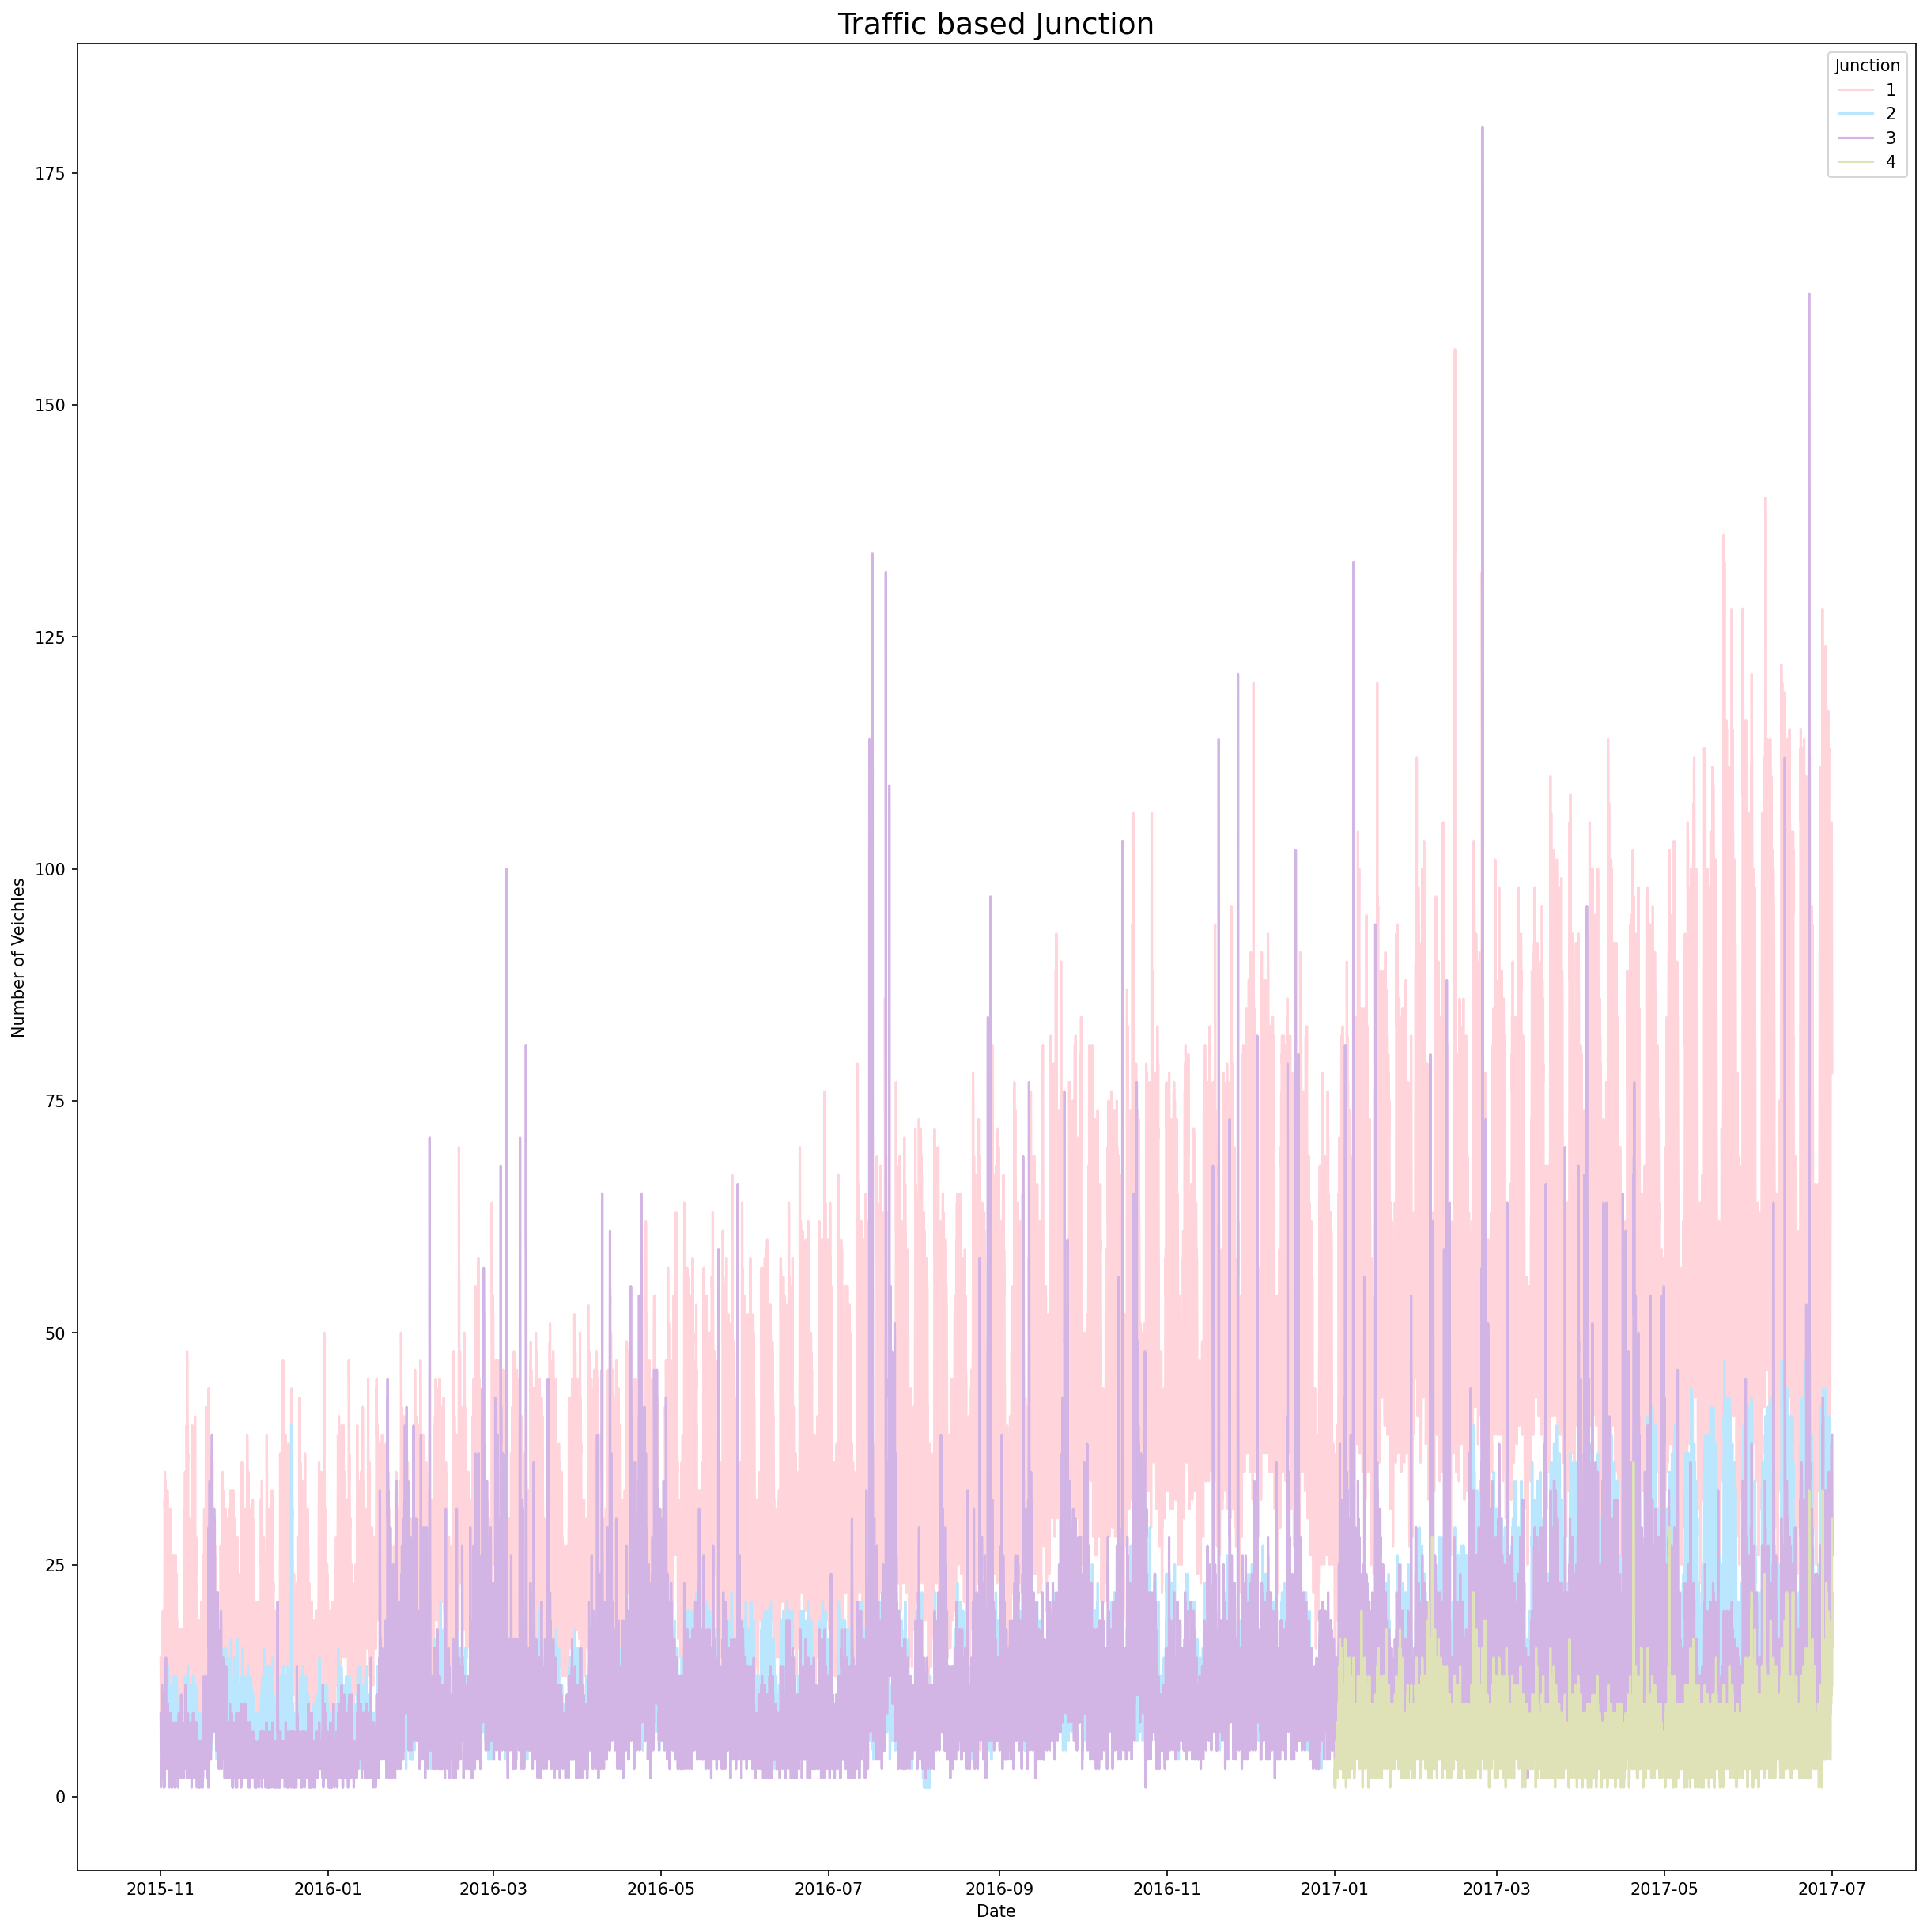

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
palette = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20, 20), dpi=150)
series = sns.lineplot(x=df['DateTime'], y = "Vehicles", data=df, hue="Junction", palette=palette)
series.set_title("Traffic based Junction", fontsize=18)
series.set_ylabel("Number of Veichles")
series.set_xlabel('Date')

In [11]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Date_no'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


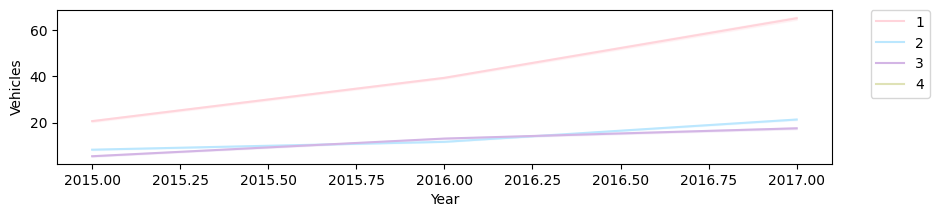

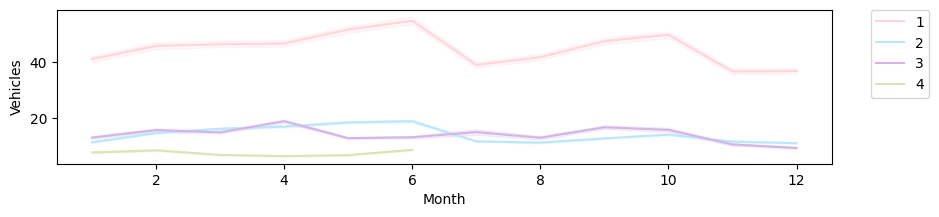

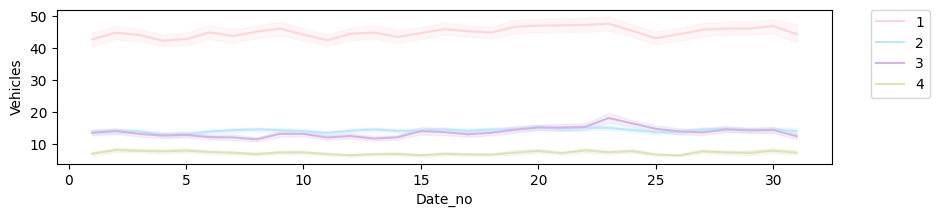

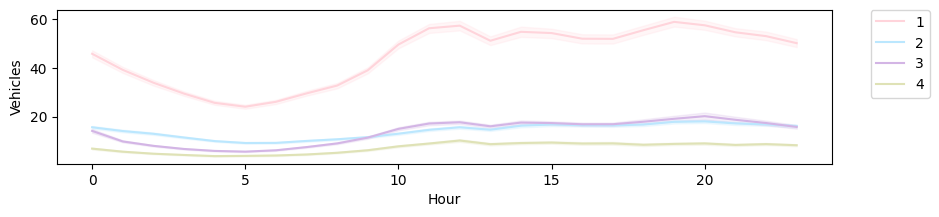

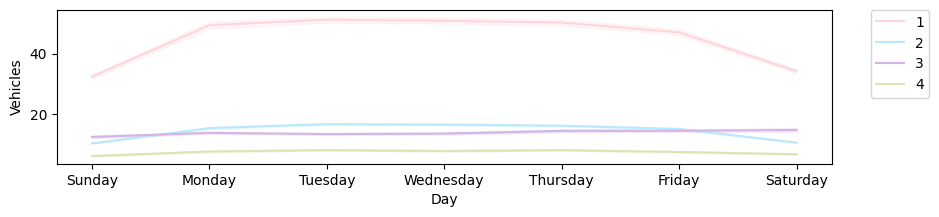

In [12]:
created_feature = ['Year', 'Month', 'Date_no', 'Hour', 'Day']

for i in created_feature:
    plt.figure(figsize=(10, 2), dpi=100)
    ax = sns.lineplot(x=df[i], y='Vehicles', data=df, hue='Junction', palette = palette)
    plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Date')

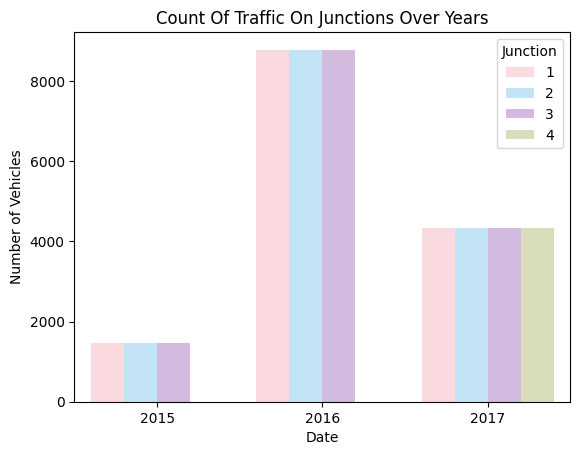

In [13]:
sns.countplot(x='Year', data=df, palette=palette , hue = 'Junction')
plt.title('Count Of Traffic On Junctions Over Years')
plt.ylabel("Number of Vehicles")
plt.xlabel("Date")

# **adding column**

In [14]:
# Categorize maintenance levels based on number of vehicles
maintenance_categories = []

for index, row in df.iterrows():
    num_vehicles = row['Vehicles']
    if num_vehicles < 25:
        category = 'Low'
    elif num_vehicles < 100:
        category = 'Medium'
    else:
        category = 'High'
    maintenance_categories.append(category)

# Add the maintenance categories to the dataframe
df['maintenance'] = maintenance_categories

df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day,maintenance
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday,Low
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday,Low
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday,Low
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday,Low
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday,Low


# **heatmap**

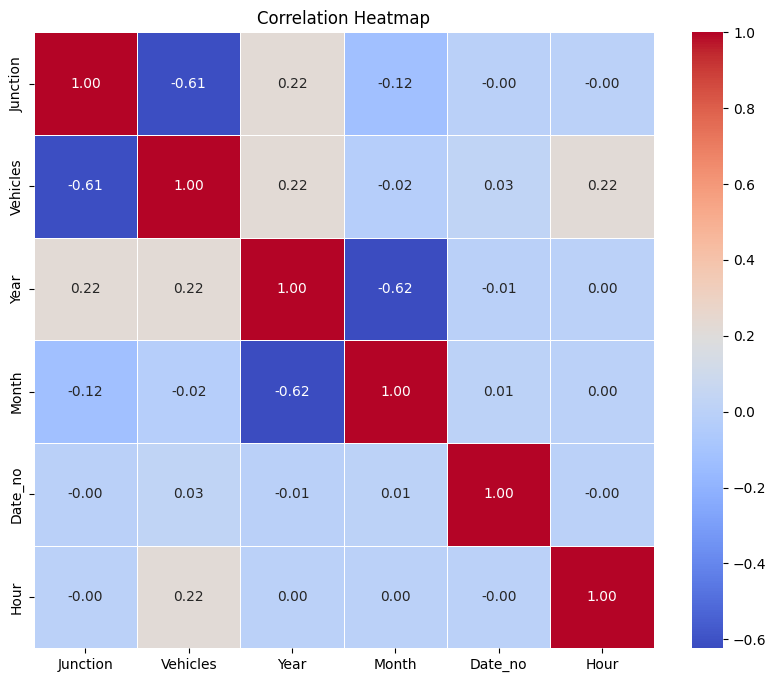

In [15]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


conclusion from the above plots

Yearly, there has been an upward trend for all junctions except for the fourth junction. As we already established above that the fourth junction has limited data and that don't span over a year.

We can see that there is an influx in the first and second junctions around June. I presume this may be due to summer break and activities around the same.

Monthly, throughout all the dates there is a good consistency in data.

For a day, we can see that are peaks during morning and evening times and a decline during night hours. This is as per expectation.

For weekly patterns, Sundays enjoy smoother traffic as there are lesser vehicles on roads. Whereas Monday to Friday the traffic is steady.

 ***Model***

# **Model**

In [16]:
X = df.drop(['maintenance', 'DateTime'], axis=1)
y = df['maintenance']

X = pd.get_dummies(X, drop_first=False)

y = y.astype('category').cat.codes

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model2 = Sequential([
    Dense(6, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(6, activation='relu',),
    Dense(6, activation='relu',),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 189 (756.00 B)

 Trainable params: 189 (756.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=50)

Epoch 1/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6121 - loss: 0.7487 - val_accuracy: 0.9174 - val_loss: 0.2596
Epoch 2/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9369 - loss: 0.2005 - val_accuracy: 0.9726 - val_loss: 0.0904
Epoch 3/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9793 - loss: 0.0749 - val_accuracy: 0.9871 - val_loss: 0.0499
Epoch 4/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9894 - loss: 0.0435 - val_accuracy: 0.9892 - val_loss: 0.0382
Epoch 5/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9895 - loss: 0.0369 - val_accuracy: 0.9895 - val_loss: 0.0318
Epoch 6/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9922 - loss: 0.0278 - val_accuracy: 0.9906 - val_loss: 0.0262
Epoch 7/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0250 - val_accuracy: 0.9918 - val_loss: 0.0200
Epoch 8/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9922 - loss: 0.0185 - val_accu

In [23]:
model2.evaluate(X_train, y_train)

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9991 - loss: 0.0015


[0.0017037566285580397, 0.9991427659988403]

In [24]:
model2.evaluate(X_test, y_test)

301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9990 - loss: 0.0025


[0.0017164569580927491, 0.9991687536239624]

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.999168744804655
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       1.00      1.00      1.00      6734
           2       1.00      1.00      1.00      2837

    accuracy                           1.00      9624
   macro avg       0.98      0.97      0.97      9624
weighted avg       1.00      1.00      1.00      9624

Confusion Matrix:
 [[  48    0    5]
 [   0 6734    0]
 [   3    0 2834]]


<Axes: >

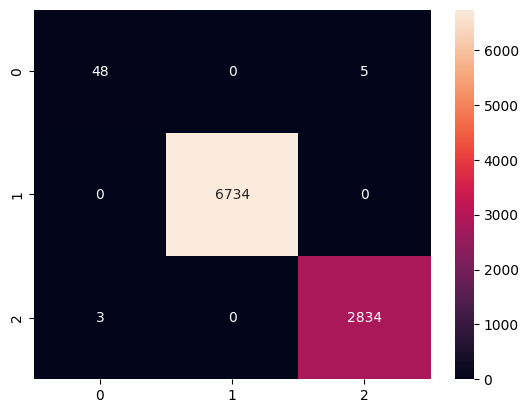

In [25]:
# Predict on the test set
y_pred2 = model2.predict(X_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes2)
classification_rep = classification_report(y_test, y_pred_classes2)
conf_matrix = confusion_matrix(y_test, y_pred_classes2)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d')

In [26]:
model2.save('model4.h5')

In [27]:

import tensorflow as tf
loaded_model = tf.keras.models.load_model('model4.h5')